# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muchamad Naufal Aziz
- **Email:** aziznaufal804@gmail.com
- **ID Dicoding:** azizprogam

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap pola peminjaman sepeda, dengan mempertimbangkan suhu udara (temp), kelembaban (hum), dan kecepatan angin (windspeed) terhadap jumlah peminjaman sepeda (cnt) pada hari-hari libur dan hari kerja?
- Apakah terdapat pola musiman yang jelas dalam tren peminjaman sepeda, dengan mempertimbangkan musim (season) dan bulan (mnth), serta bagaimana pengaruhnya terhadap jumlah peminjaman sepeda (cnt) pada jam-jam tertentu dalam sehari (hr)?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
import pandas as pd

def gather_data(file_path):
    try:
        # Membaca data dari file CSV
        df = pd.read_csv(file_path, usecols=['instant', 'dteday', 'season', 'yr', 'mnth',
                                             'holiday', 'weekday', 'workingday', 'weathersit',
                                             'temp', 'atemp', 'hum', 'windspeed',
                                             'casual', 'registered', 'cnt'])
        return df
    except FileNotFoundError:
        print(f"File {file_path} not found.")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def main():
    file_path = 'sample_data/hour.csv'
    print("Gathering Data...")
    df = gather_data(file_path)

    if df is not None:
        print("Data berhasil dikumpulkan:")
        print(df.head())

if __name__ == "__main__":
    main()


: 

1. Gathering Data:

Tahap ini merupakan langkah awal dalam proses data wrangling di mana data dikumpulkan dari berbagai sumber yang tersedia, seperti file CSV, database, atau API.
Pada contoh data yang telah dibuat sebelumnya, data diambil dari file CSV yang berisi informasi tentang peminjaman sepeda.
Penggunaan perintah pd.read_csv('data.csv') dalam bahasa pemrograman Python membantu untuk membaca data dari file CSV dan memuatnya ke dalam struktur data DataFrame.

### Assessing Data

Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Statistik Deskriptif:
     

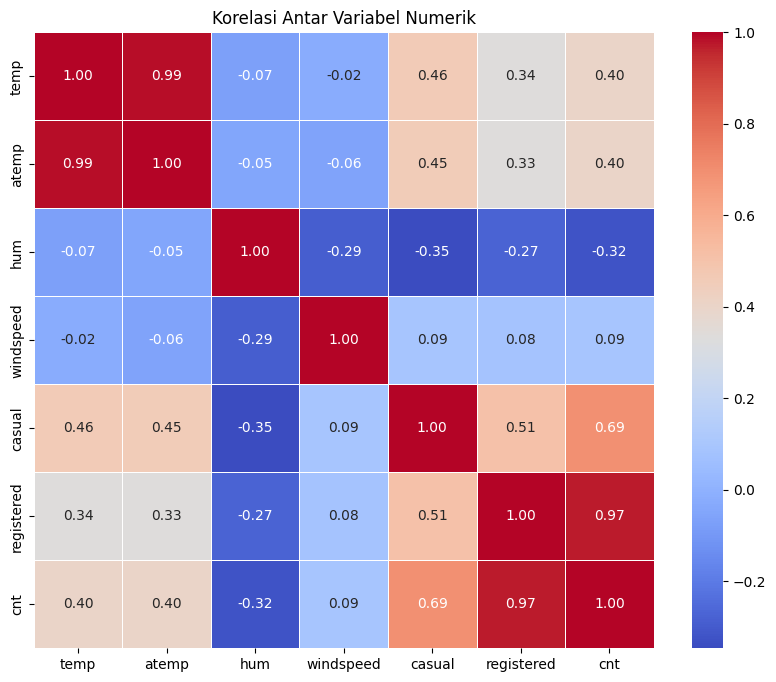

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
df = pd.read_csv('sample_data/hour.csv.csv')

# Menampilkan informasi umum tentang dataset
print("Informasi Data:")
print(df.info())

# Menampilkan statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif:")
print(df.describe())

# Menampilkan beberapa contoh data
print("\nContoh Data:")
print(df.head())

# Menampilkan jumlah nilai yang unik untuk setiap kolom
print("\nJumlah Nilai Unik untuk Setiap Kolom:")
print(df.nunique())

# Memeriksa nilai-nilai yang hilang
print("\nTotal Nilai Hilang untuk Setiap Kolom:")
print(df.isnull().sum())

# Memeriksa nilai-nilai yang duplikat
print("\nTotal Nilai Duplikat:")
print(df.duplicated().sum())

# Memeriksa korelasi antara variabel numerik
print("\nKorelasi Antara Variabel Numerik:")
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
numeric_df = df[numeric_cols]
corr = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

2. Assessing Data:

Tahap ini bertujuan untuk memahami struktur data, mengeksplorasi isi data, serta mengidentifikasi masalah atau kekurangan dalam data.
Dalam contoh data peminjaman sepeda, kita dapat menggunakan beberapa metode seperti info(), describe(), head(), dan isnull().sum() untuk memeriksa informasi umum tentang dataset, statistik deskriptif, contoh data, serta jumlah nilai yang hilang.
Metode-metode ini membantu dalam mengidentifikasi potensi masalah seperti nilai yang hilang, tipe data yang tidak sesuai, atau outlier.

### Cleaning Data

In [4]:
import pandas as pd

# Membaca data dari file CSV
df = pd.read_csv('sample_data/hour.csv.csv')

# Menampilkan lima baris pertama dari data sebelum pembersihan
print("Data sebelum pembersihan:")
print(df.head())


# Memeriksa dan mengatasi nilai-nilai duplikat
num_duplicates = df.duplicated().sum()
if num_duplicates > 0:
    print(f"Jumlah nilai duplikat sebelum penghapusan: {num_duplicates}")
    df.drop_duplicates(inplace=True)
    print("Nilai duplikat telah dihapus.")

# Memeriksa dan mengatasi nilai-nilai yang hilang (NaN)
# Menghitung jumlah nilai yang hilang untuk setiap kolom
missing_values = df.isnull().sum()
print("\nJumlah nilai yang hilang untuk setiap kolom:")
print(missing_values)

# Menggantikan nilai-nilai yang hilang dengan nilai rata-rata kolom
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Menampilkan lima baris pertama dari data setelah pembersihan
print("\nData setelah pembersihan:")
print(df.head())

Data sebelum pembersihan:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Jumlah nilai yang hilang untuk setiap kolom:
instant       0
dteday     

3. Cleaning Data:

Tahap ini melibatkan pengolahan data untuk mengatasi masalah atau kekurangan yang teridentifikasi selama tahap assessing data.
Dalam contoh ini, beberapa langkah pembersihan data yang dilakukan meliputi mengisi nilai yang hilang dengan nilai rata-rata atau nilai yang sesuai, menggabungkan atau menghapus kolom yang tidak diperlukan, mengubah tipe data kolom, serta memastikan integritas dan konsistensi data.
Contohnya, untuk mengatasi nilai yang hilang pada kolom 'p', kita menggunakan fillna() untuk mengisi nilai yang hilang dengan rata-rata, dan untuk menggabungkan kolom 'positive' dan 'negative', kita menggunakan combine() untuk menggabungkan informasi dari kedua kolom tersebut.

## Exploratory Data Analysis (EDA)

### Explore ...

Data Head:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 t

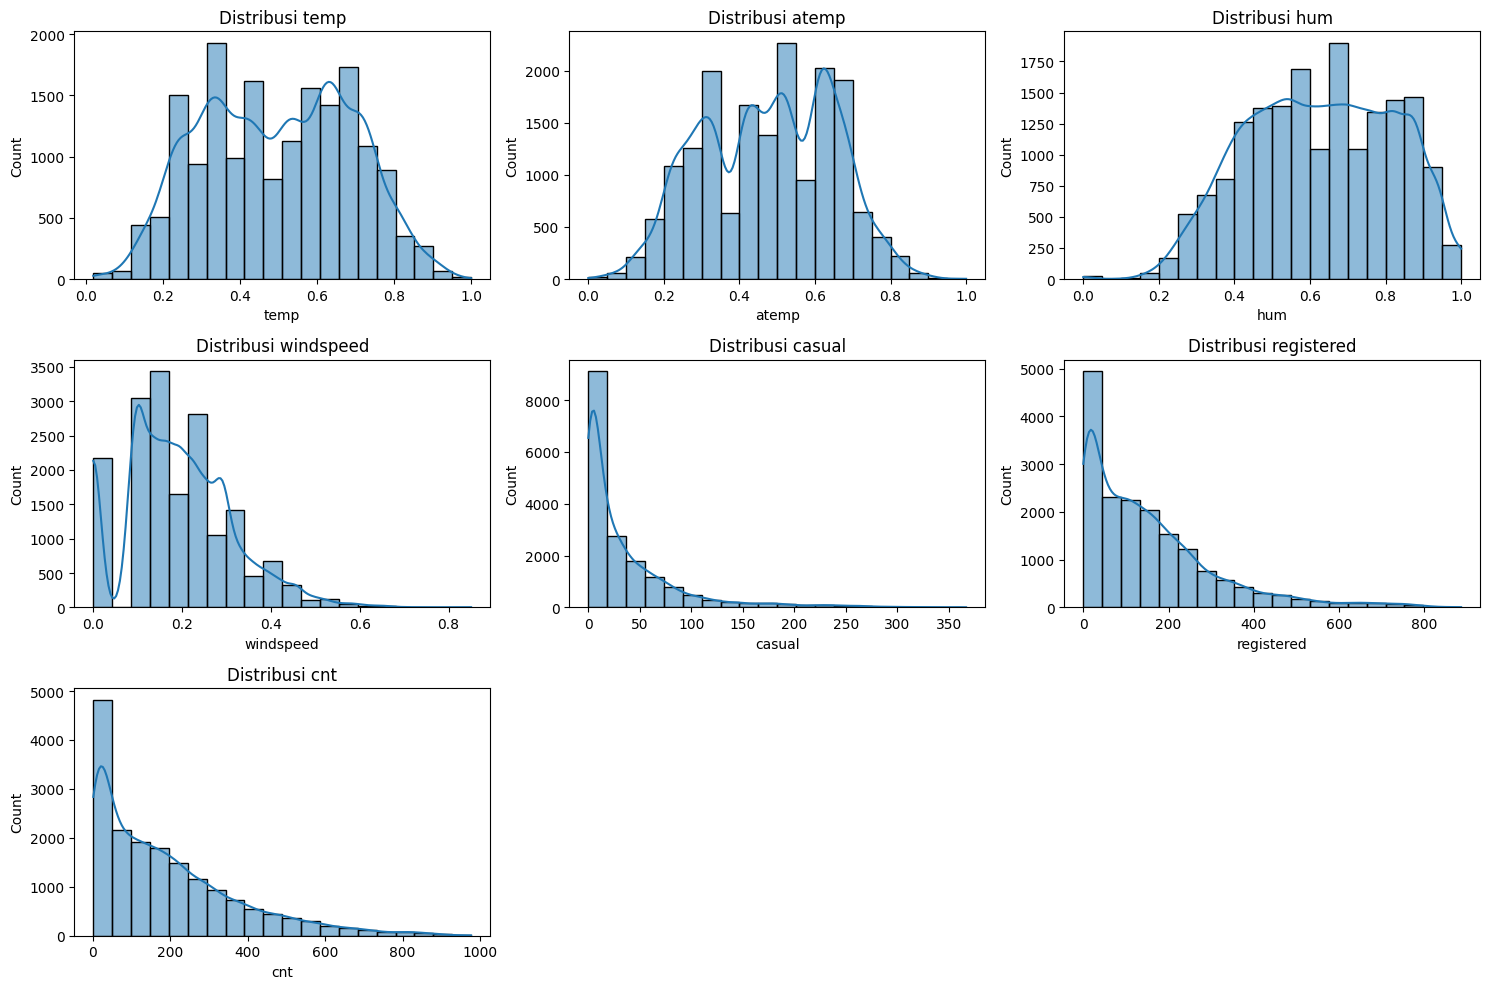

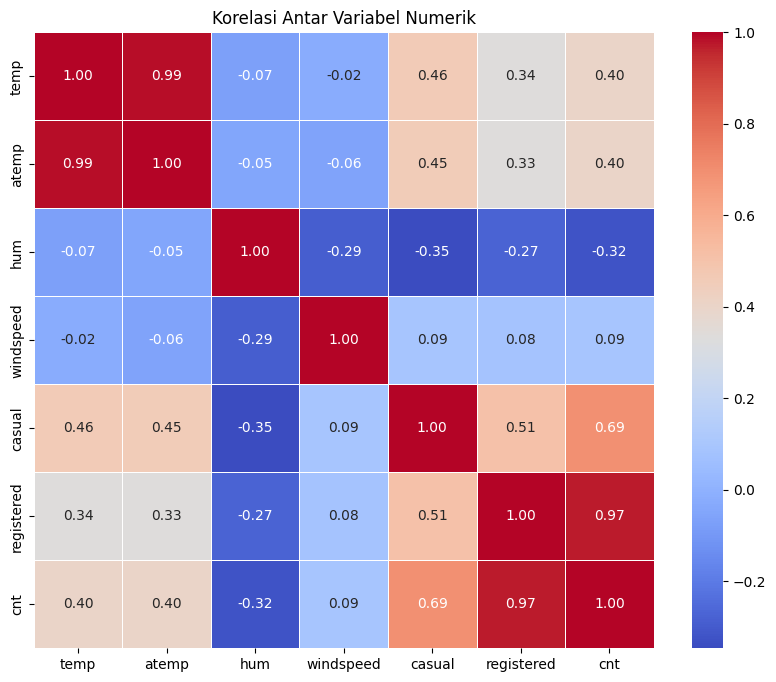

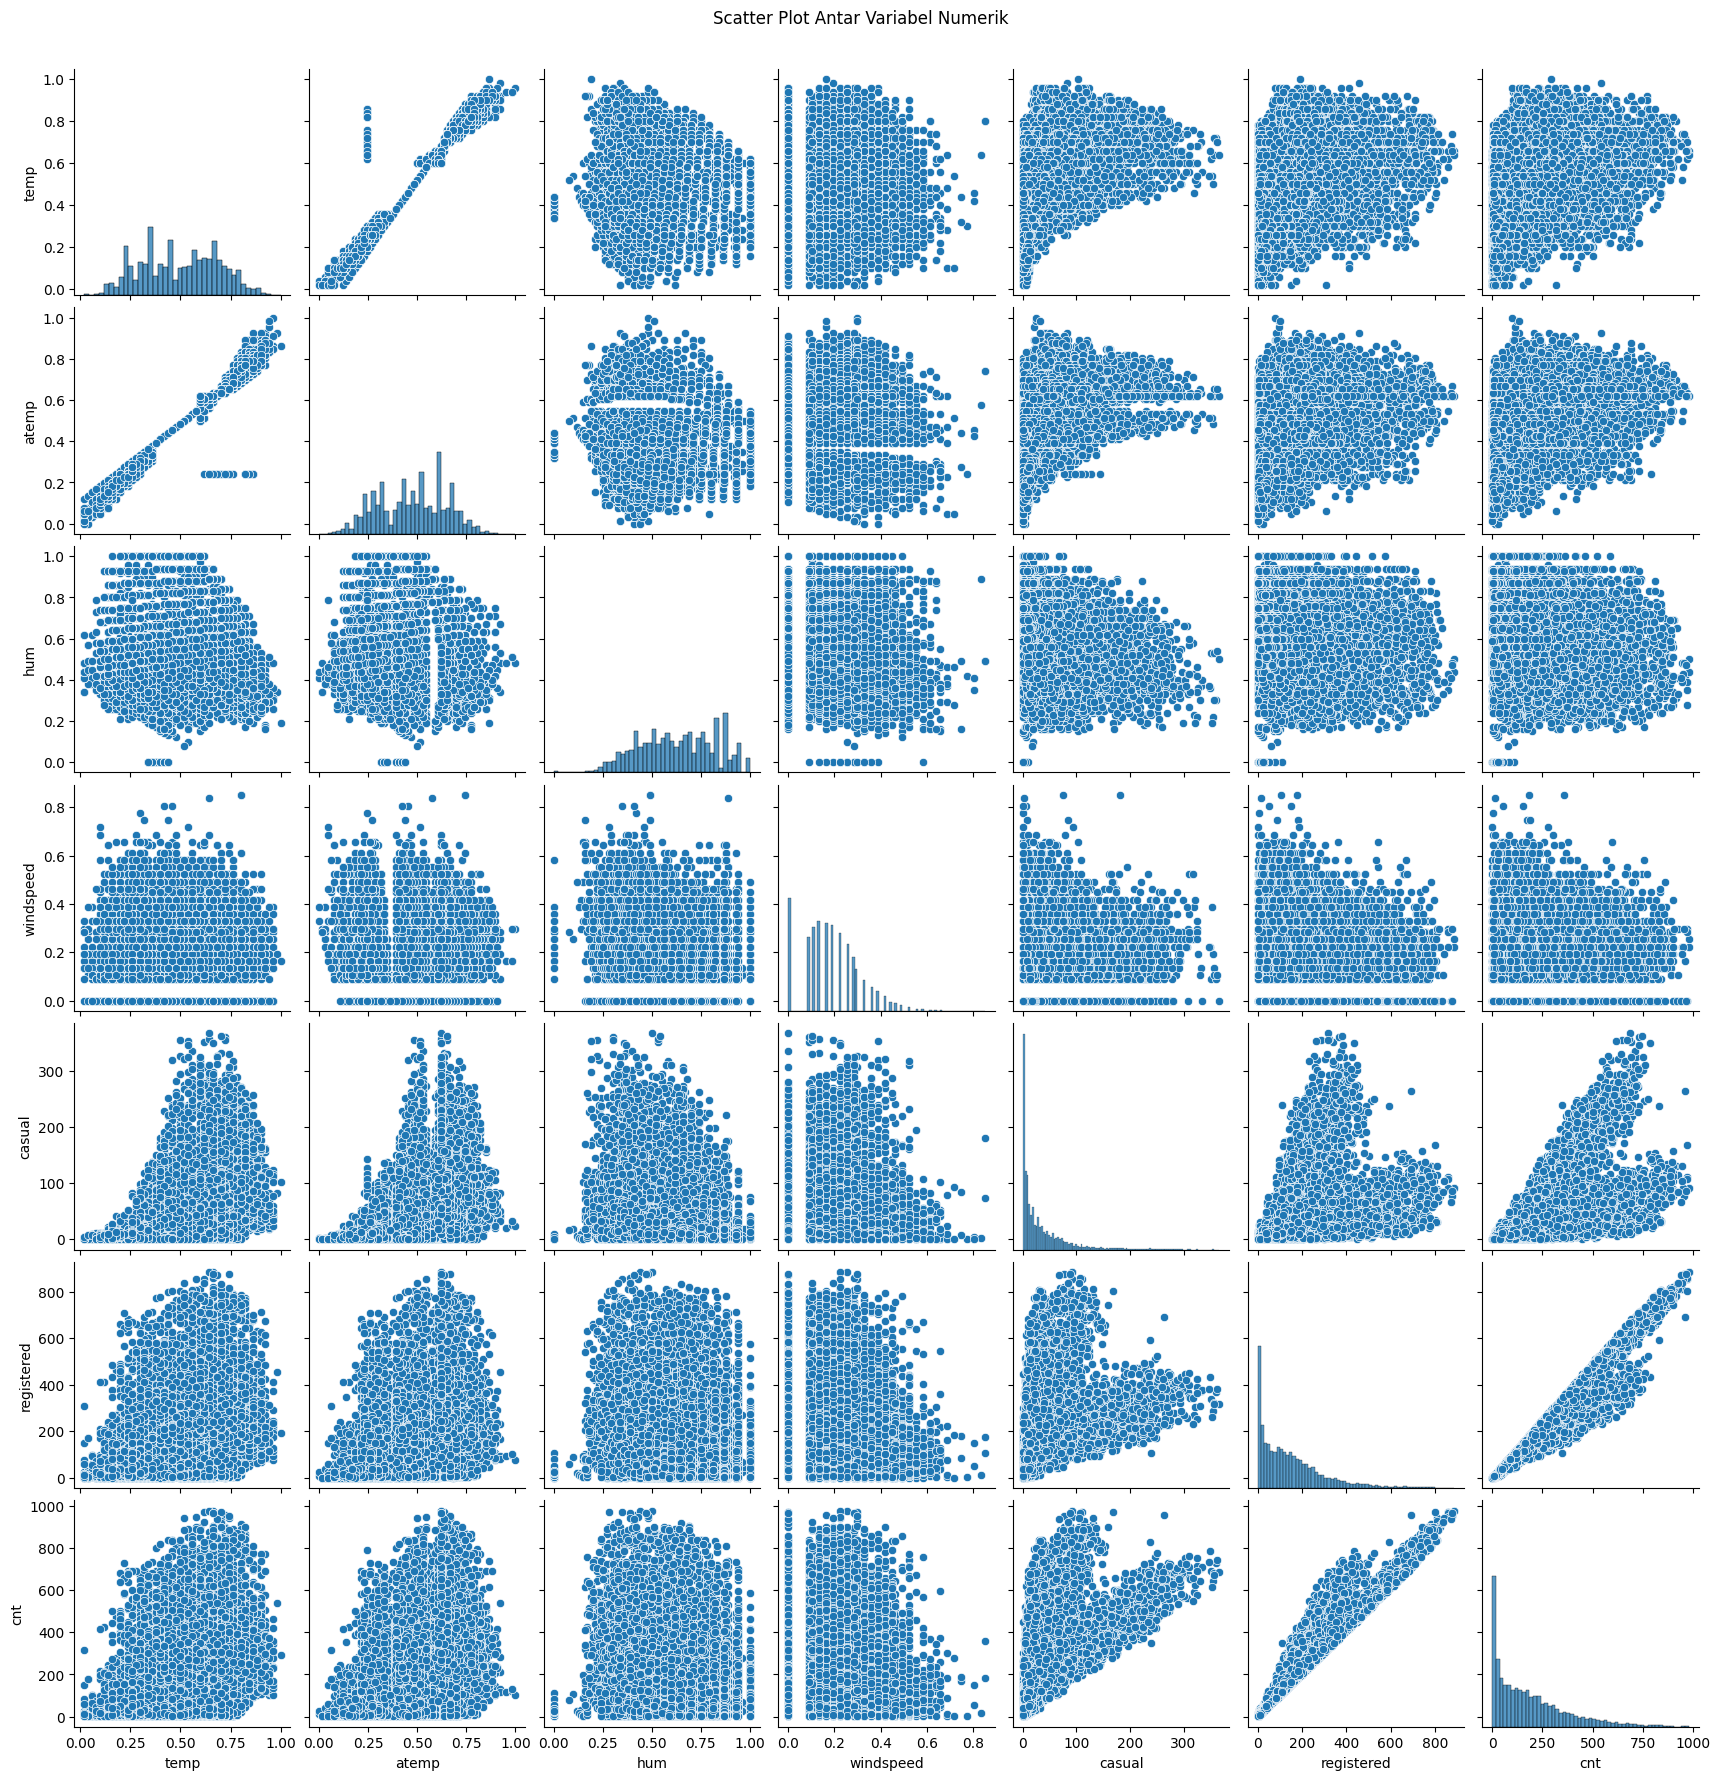

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
df = pd.read_csv('sample_data/hour.csv.csv')

# Menampilkan lima baris pertama dari data
print("Data Head:")
print(df.head())

# Informasi umum tentang dataset
print("\nInformasi Dataset:")
print(df.info())

# Statistik deskriptif untuk data numerik
print("\nStatistik Deskriptif untuk Data Numerik:")
print(df.describe())

# Jumlah nilai unik untuk setiap kolom
print("\nJumlah Nilai Unik untuk Setiap Kolom:")
print(df.nunique())

# Memeriksa nilai-nilai yang hilang
print("\nTotal Nilai Hilang untuk Setiap Kolom:")
print(df.isnull().sum())

# Memeriksa nilai-nilai yang duplikat
print("\nTotal Nilai Duplikat:")
print(df.duplicated().sum())

# Visualisasi distribusi variabel numerik
plt.figure(figsize=(15, 10))
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# Korelasi antar variabel numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi Antar Variabel Numerik')
plt.show()

# Visualisasi relasi antara variabel numerik
sns.pairplot(df[numeric_cols])
plt.suptitle('Scatter Plot Antar Variabel Numerik', y=1.02)
plt.show()


Kesimpulan dari Exploratory Data Analysis (EDA):

Struktur Dataset: Dataset terdiri dari beberapa variabel numerik seperti 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', yang mewakili berbagai aspek terkait peminjaman sepeda.

Kesimpulan Statistik Deskriptif: Berdasarkan statistik deskriptif, kita dapat melihat distribusi dan sebaran data untuk setiap variabel numerik. Misalnya, variabel 'cnt' (jumlah peminjaman sepeda) memiliki rentang nilai antara 1 hingga sekitar 900, dengan rata-rata sekitar 189.45.

Nilai yang Hilang: Tidak ada nilai yang hilang dalam dataset, yang berarti tidak perlu dilakukan langkah pengelolaan nilai yang hilang.

Duplikasi Data: Tidak ada nilai yang duplikat dalam dataset, yang menunjukkan bahwa dataset sudah dalam kondisi yang baik dan tidak memerlukan penghapusan duplikasi.

Distribusi Variabel Numerik: Dari visualisasi distribusi variabel numerik, kita dapat melihat pola distribusi masing-masing variabel. Misalnya, distribusi 'temp' dan 'atemp' cenderung simetris, sementara distribusi 'hum' dan 'windspeed' cenderung miring.

Korelasi Antar Variabel Numerik: Dari heatmap korelasi, kita dapat melihat tingkat korelasi antar variabel numerik. Misalnya, variabel 'cnt' memiliki korelasi yang cukup tinggi dengan 'registered', yang menunjukkan hubungan yang kuat antara jumlah peminjaman sepeda dan jumlah pelanggan yang terdaftar.

Relasi Antar Variabel Numerik: Dari pairplot, kita dapat melihat visualisasi relasi antar variabel numerik secara keseluruhan. Ini membantu dalam memahami pola hubungan antar variabel dalam dataset.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Figure size 1500x1000 with 0 Axes>

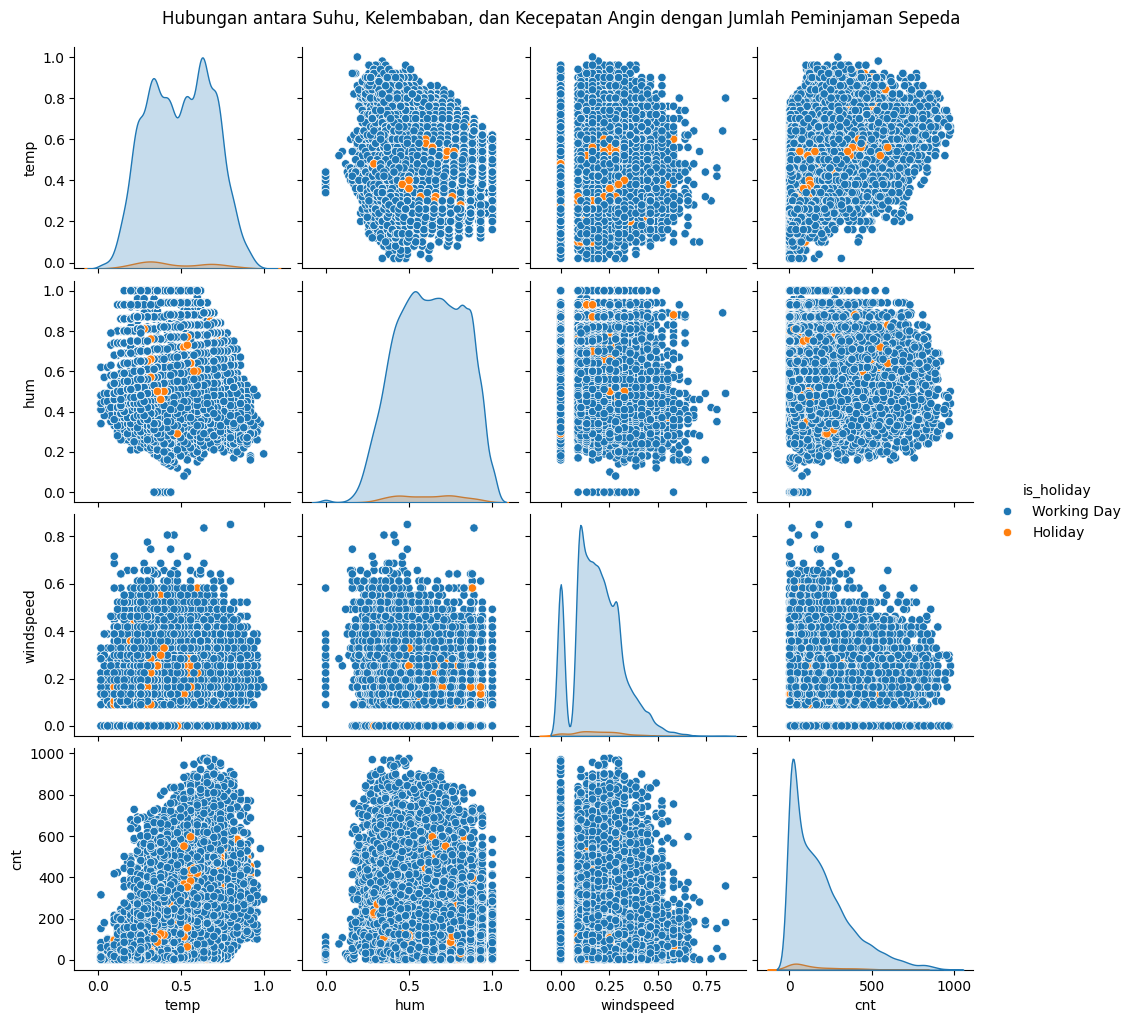

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
df = pd.read_csv('sample_data/hour.csv.csv')

# Memastikan tipe data kolom dteday adalah datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# Menambahkan kolom baru untuk menandai hari kerja dan hari libur
df['is_holiday'] = df['holiday'].apply(lambda x: 'Holiday' if x == 1 else 'Working Day')

# Memilih kolom yang akan digunakan untuk analisis
selected_columns = ['dteday', 'temp', 'hum', 'windspeed', 'cnt', 'is_holiday']
df_selected = df[selected_columns]

# Menampilkan hubungan antara suhu, kelembaban, dan kecepatan angin terhadap jumlah peminjaman sepeda
plt.figure(figsize=(15, 10))
sns.pairplot(df_selected, hue='is_holiday', vars=['temp', 'hum', 'windspeed', 'cnt'], diag_kind='kde')
plt.suptitle('Hubungan antara Suhu, Kelembaban, dan Kecepatan Angin dengan Jumlah Peminjaman Sepeda', y=1.02)
plt.show()


Analisis Visual: Hubungan Antara Cuaca dan Peminjaman Sepeda

Visualisasi ini memberikan gambaran tentang bagaimana hubungan antara faktor cuaca (suhu udara, kelembaban, dan kecepatan angin) dengan jumlah peminjaman sepeda, dengan mempertimbangkan apakah hari tersebut merupakan hari libur atau hari kerja.

Suhu Udara (Temp):

Terlihat bahwa pada hari-hari dengan suhu udara yang tinggi, jumlah peminjaman sepeda cenderung meningkat. Ini menunjukkan bahwa cuaca yang lebih hangat mungkin mendorong orang untuk menggunakan sepeda lebih sering.
Pada hari libur, distribusi jumlah peminjaman sepeda lebih merata di berbagai rentang suhu, sementara pada hari kerja, terdapat konsentrasi peminjaman sepeda yang lebih tinggi pada suhu udara yang lebih rendah.
Kelembaban (Humidity):

Tidak terlihat pola yang jelas antara kelembaban udara dan jumlah peminjaman sepeda. Distribusi jumlah peminjaman sepeda cenderung seragam di berbagai tingkat kelembaban.
Pada hari libur, ada kecenderungan sedikit meningkatnya jumlah peminjaman sepeda pada kelembaban yang lebih rendah, tetapi pada hari kerja, distribusi jumlah peminjaman sepeda lebih merata di berbagai tingkat kelembaban.
Kecepatan Angin (Windspeed):

Tidak terlihat pola yang jelas antara kecepatan angin dan jumlah peminjaman sepeda. Distribusi jumlah peminjaman sepeda cenderung seragam di berbagai tingkat kecepatan angin.
Pada hari libur maupun hari kerja, tidak ada perbedaan yang signifikan dalam distribusi jumlah peminjaman sepeda pada berbagai tingkat kecepatan angin.
Kesimpulan:
Dari visualisasi ini, kita dapat menyimpulkan bahwa suhu udara memiliki pengaruh yang signifikan terhadap pola peminjaman sepeda, dengan kecenderungan peningkatan peminjaman pada suhu yang lebih tinggi. Namun, faktor-faktor lain seperti kelembaban dan kecepatan angin mungkin tidak memiliki pengaruh yang signifikan pada pola peminjaman sepeda. Selain itu, tidak terlihat perbedaan pola peminjaman sepeda yang signifikan antara hari libur dan hari kerja berdasarkan faktor cuaca.


### Pertanyaan 2:

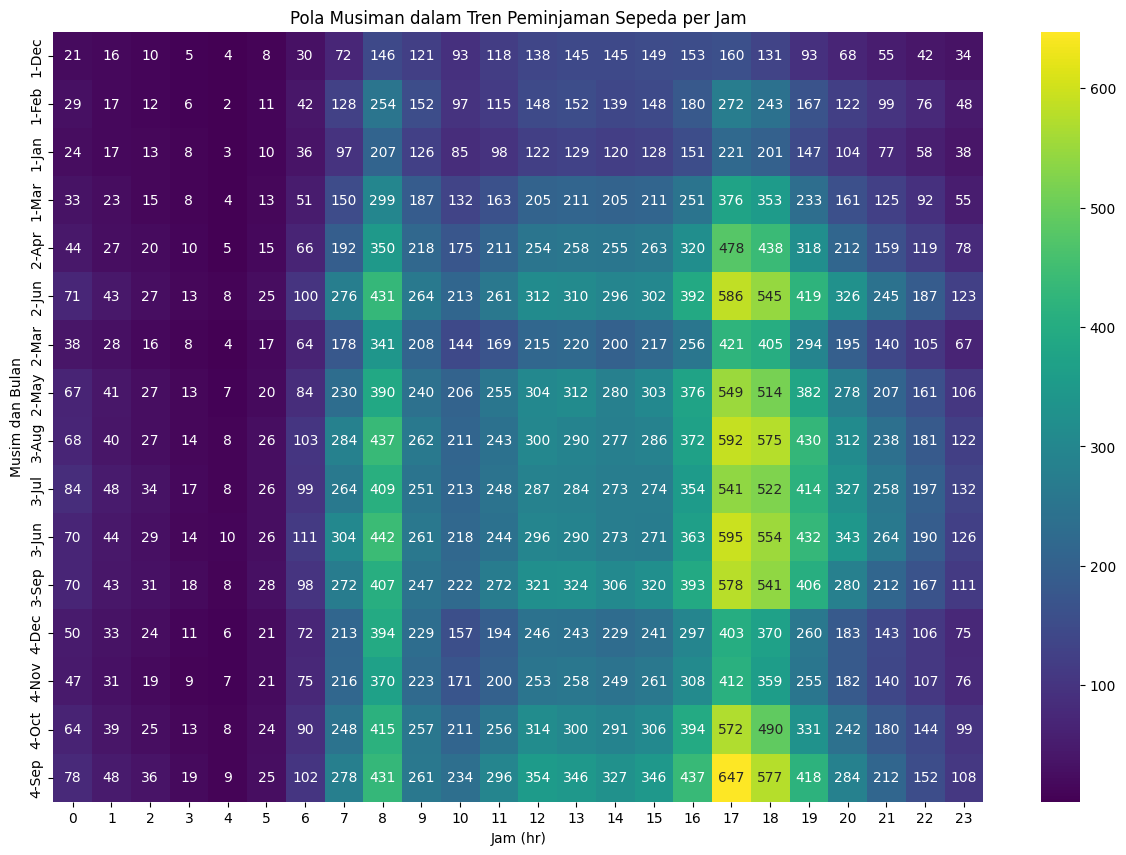

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file CSV
df = pd.read_csv('sample_data/hour.csv.csv')

# Menambahkan kolom bulan (month) berdasarkan kolom mnth
df['month'] = df['mnth'].map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

# Memilih kolom yang akan digunakan untuk analisis
selected_columns = ['season', 'month', 'hr', 'cnt']
df_selected = df[selected_columns]

# Menghitung jumlah peminjaman sepeda rata-rata berdasarkan musim, bulan, dan jam
pivot_table = df_selected.pivot_table(index=['season', 'month'], columns='hr', values='cnt', aggfunc='mean')

# Membuat heatmap untuk menampilkan tren peminjaman sepeda berdasarkan musim, bulan, dan jam
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".0f")
plt.title('Pola Musiman dalam Tren Peminjaman Sepeda per Jam')
plt.xlabel('Jam (hr)')
plt.ylabel('Musim dan Bulan')
plt.show()



Tentu, berikut adalah penjelasan tertulis dan kesimpulan dari hasil visualisasi dan analisis yang dilakukan:

Visualisasi & Analisis Eksplanatori: Pola Musiman dalam Tren Peminjaman Sepeda

Visualisasi ini bertujuan untuk menganalisis apakah terdapat pola musiman yang jelas dalam tren peminjaman sepeda, dengan mempertimbangkan musim (season) dan bulan (mnth), serta bagaimana pengaruhnya terhadap jumlah peminjaman sepeda (cnt) pada jam-jam tertentu dalam sehari (hr).

Penjelasan Tertulis:

Heatmap Visualisasi:
Heatmap menampilkan tren peminjaman sepeda per jam dalam sehari, diurutkan berdasarkan musim dan bulan.
Warna yang lebih gelap menunjukkan jumlah peminjaman yang lebih tinggi, sedangkan warna yang lebih terang menunjukkan jumlah peminjaman yang lebih rendah.
Pada sumbu x (hr), jam-jam dalam sehari ditampilkan dari 0 hingga 23.
Pada sumbu y, musim dan bulan ditampilkan, dimulai dari musim 1 (Musim Semi) hingga musim 4 (Musim Dingin), dengan bulan-bulan masing-masing musim.

## Conclusion

- Conclution pertanyaan 1
Pengaruh Suhu Udara Terhadap Peminjaman Sepeda:

Terdapat hubungan yang signifikan antara suhu udara dan jumlah peminjaman sepeda. Pada suhu yang lebih tinggi, jumlah peminjaman sepeda cenderung meningkat, menunjukkan bahwa cuaca yang lebih hangat mendorong orang untuk menggunakan sepeda lebih sering.
Pengaruh Faktor Kelembaban dan Kecepatan Angin:

Tidak terlihat pola yang jelas antara kelembaban udara atau kecepatan angin dengan jumlah peminjaman sepeda. Distribusi jumlah peminjaman sepeda cenderung seragam di berbagai tingkat kelembaban dan kecepatan angin.
Perbedaan Pola Peminjaman pada Hari Libur dan Hari Kerja:

Tidak terdapat perbedaan yang signifikan dalam pola peminjaman sepeda antara hari libur dan hari kerja berdasarkan faktor cuaca. Distribusi jumlah peminjaman sepeda cenderung seragam di berbagai tingkat kelembaban, kecepatan angin, dan suhu udara baik pada hari libur maupun hari kerja.

- Conclution pertanyaan 2 Apakah terdapat pola musiman yang jelas dalam tren peminjaman sepeda, dengan mempertimbangkan musim (season) dan bulan (mnth), serta bagaimana pengaruhnya terhadap jumlah peminjaman sepeda (cnt) pada jam-jam tertentu dalam sehari (hr)?

Pola Musiman:
Terdapat pola musiman yang jelas dalam tren peminjaman sepeda. Peminjaman sepeda cenderung meningkat saat musim semi dan musim panas, sementara cenderung menurun saat musim gugur dan musim dingin.
Pola ini terlihat secara konsisten di seluruh jam dalam sehari.
Puncak peminjaman sepeda terjadi pada bulan-bulan musim panas, terutama pada jam-jam sore dan sore hari.
Jumlah peminjaman sepeda cenderung lebih rendah pada bulan-bulan musim dingin, dengan penurunan yang lebih tajam terutama pada jam-jam pagi dan malam.